# Imports

In [2]:
#%autoreload 2
import pandas as pd
import numpy as np
import geopandas as gpd
import sys
sys.path.append('/warehouse/COMPLEXNET/jlevyabi/network_representation/python_scripts/')
import helpers_ses_prediction as hsp
from tqdm import tqdm
import pickle
from tqdm import tqdm_notebook as tqdmn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np
import geopandas as gpd
from datetime import datetime
from collections import Counter
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point
from scipy.spatial import cKDTree
from collections import Counter
#from geopy.distance import vincentys

Import of gensim commented. Remove when needed


/home/jlevyabi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')

# Select home location for users

In [3]:
import pickle
dic_final_not_nan=pickle.load(open(
    "/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/all_together_dic.p","rb"))
dic_iris_not_nan=pickle.load(open(
    "/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/all_together_dic_iris.p","rb"))

Load [home selection functions](#home_selection)

### Home Selection

In [9]:
home_most_freq_all=go_through_home_candidates(dic_final_not_nan,take_most_frequent)
home_most_freq_night=go_through_home_candidates(dic_final_not_nan,take_most_frequent_night)

home_most_freq_all_iris=go_through_home_candidates(dic_iris_not_nan,take_most_frequent)
home_most_freq_night_iris=go_through_home_candidates(dic_iris_not_nan,take_most_frequent_night)
%clear

HBox(children=(IntProgress(value=0, max=28397), HTML(value='')))

HBox(children=(IntProgress(value=0, max=28397), HTML(value='')))

HBox(children=(IntProgress(value=0, max=24109), HTML(value='')))

HBox(children=(IntProgress(value=0, max=24109), HTML(value='')))

In [10]:
print("Number of geolocated users INSEE(most freq) ... %d"%len(home_most_freq_all))
print("Number of geolocated users INSEE(most freq night) ... %d"%len(home_most_freq_night))
print("Number of geolocated users IRIS(most freq) ... %d"%len(home_most_freq_all_iris))
print("Number of geolocated users INSEE(most freq night) ... %d"%len(home_most_freq_night_iris))
print("Number of geolocated users with INSEE and IRIS info ...%d"%
      len(set(list(dic_final_not_nan.keys())).intersection(set(list(dic_iris_not_nan.keys())))))

Number of geolocated users INSEE(most freq) ... 28397
Number of geolocated users INSEE(most freq night) ... 24032
Number of geolocated users IRIS(most freq) ... 24109
Number of geolocated users INSEE(most freq night) ... 17588
Number of geolocated users with INSEE and IRIS info ...24109


### User to Income DataFrames for INSEE and IRIS

In [66]:
usr_2_ses_mode_insee=pd.DataFrame([x.values for x in home_most_freq_all.values()],
                            columns=(list(home_most_freq_all.values())[0]).keys())
usr_2_ses_mode_insee["poor_men"]=(usr_2_ses_mode_insee.men_prop/usr_2_ses_mode_insee.men)
usr_2_ses_mode_iris=pd.DataFrame([x.values for x in home_most_freq_all_iris.values()],
                            columns=(list(home_most_freq_all_iris.values())[0]).keys())

In [ ]:
locs = [tuple(x) for x in usr_2_ses_mode_insee[["lat","lon"]].values]
dic_count_locs=Counter(locs)

In [50]:
import helpers_ses_prediction as hsp
nb_class=2
usr_2_ses_mode_insee_no_rep["poor_men_class"]=ses_classify(nb_class-1-usr_2_ses_mode_insee_no_rep.poor_men,nb_class)
usr_2_ses_mode_insee_no_rep["income_class"]=ses_classify(usr_2_ses_mode_insee_no_rep.income,nb_class)
usr_2_ses_mode_iris["income_class"]=ses_classify(usr_2_ses_mode_iris.DEC_D913,nb_class)
usr_2_ses_mode_insee_no_rep["corrected_income"]=get_cor_income(usr_2_ses_mode_insee_no_rep)
#usr_2_ses_mode=usr_2_ses_mode[usr_2_ses_mode.income_class==usr_2_ses_mode.poor_men_class]

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [13]:
test=pd.merge(usr_2_ses_mode_insee,usr_2_ses_mode_iris,on="usr",how="inner")

## Download data from geolocated users 

Data downloaded from users with geolocations with __INSEE information__ (as also contains set of users with __IRIS dataset__)<br>

__Geolocated users__ selected from: [/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/all_together_dic.p](http://url)<br>
Tweets downloaded according to code in the __appendix__ (also can be found in my PC: [/Users/jacobolevyabitbol/Desktop/PhDMarton/projects/ses_inference_linguistic/python_scripts/get_tweets_from_geolocated_users.py](http://url))

_Clean downloaded tweets, remove retweets and merge all individual tweet files_
[/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/merge_geolocated_tweets.py](http://url)<br>
__Final file__ here: [/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/tweets/all_geolocated_users.csv](http://url)

# Build Textual Features

Please first [Run Compilation of textual features](#user_text)

**Previous version**<br>
usr_tweet_text=generate_text_data(
    fname="/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/tweets/tweets_geolocated_users.txt",
    tab_split=";")<br>
d100=pickle.load(open("/home/jlevyabi/seacabo/data_files/spec_corrected_clusters_only_pos_entries_100.p","rb"))<br>
usr_full_text=get_cluster_info(d100,usr_tweet_text);<br>
usr_full_text=usr_full_text.reset_index()<br>
usr_tweet_text=usr_tweet_text.reset_index()<br>
tweets_per_user={}<br>
for it,row in tqdmn(usr_tweet_text.iterrows()):<br>
    tweets_per_user.setdefault(row.id,(row.tweet).count("\n"))<br>

In [4]:
usr_tweet_text=pd.read_csv(
    "/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/tweets/all_geolocated_users.csv",
    sep=';',header=0,
)

In [12]:
usr_text=(usr_tweet_text.dropna(how="any").drop(["tweet_id","tweet_date"],axis=1).groupby(
    'user_id',squeeze=True,)['tweet_text'].apply(lambda x: "%s" % '\n\n'.join(x))).to_frame()
usr_text.reset_index(inplace=True)

In [14]:
print(usr_text.iloc[1]["tweet_text"])

il manque a la fin le clic sur le lien stack overflow puis le copier coller au pif d une d

en fait je n utilisais que l app je n avais meme pas conscience qu une autre app existait merci

ha faudra que je regarde je ne connais pas cette fonction merci

tu veux dire la vraie gare dans la vraie vie qui n est pas vue au travers d un smartphone quelle horreur

et donc sur l app de mes amis de la sncf il n est plus possible d obtenir les horaires d un train deja parti ca n

c est en train de revenir a la normal merci de me l avoir signale

je regarde

si le 18h de nevers part a 21h ca sera peut etre le tien

nan sur nevers je rentre par le train de 18h

setup mobile 2018 train

en bon vieux barbu j aimerais assez bosser mes slides en markdown les pusher sur u

comme chaque annee est le site qui permet aux festivaliers d echanger bons plans et critiq

effetvachequirit clermontff18

oh un mur de hashtag inception clermontff18

ca pourrait presque se deporter cote serveur la generation de sli

In [16]:
def get_cluster_info(dic_clus,df_tweets):
    nb_clusters=len(list(dic_clus.keys()))
    word2cluster_only_pos={word:cluster_nb for cluster_nb,cluster_words in dic_clus.items() for word in cluster_words}
    clust_freq_only_pos=[]
    for tweet in tqdm(df_tweets.tweet_text):
        clust_freq_only_pos.append((Counter([word2cluster_only_pos[word]
                                             for word in tweet.split() if word in word2cluster_only_pos])))
    cfd_only_pos=[{k:(v+0.0)/(sum(dic_count.values()))for k,v in dic_count.items()}
                  for dic_count in clust_freq_only_pos]
    df_tweets["cfd_%d"%nb_clusters]=[np.array(list({clus:(dic_count[clus] if clus in dic_count else 0)
                                    for clus in range(len(dic_clus))}.values())) for dic_count in cfd_only_pos]
    return (df_tweets)

In [17]:
d100=pickle.load(open("/home/jlevyabi/seacabo/data_files/spec_corrected_clusters_only_pos_entries_100.p","rb"))
usr_text=get_cluster_info(d100,usr_text);

100%|██████████| 20830/20830 [04:24<00:00, 78.69it/s]


# Problema: Hay localizaciones repetidas (no son verdaderas)

In [56]:
dgeo=pd.read_csv(header=None,sep="\t",filepath_or_buffer="/warehouse/COMPLEXNET/jlevyabi/geoloc/txt_files/2014-2015_locs.txt")
dgeo.columns=["usr","time","lat","lon"]
print("Number of geolocated tweets during 2014-2015... %d geolocations"%dgeo.shape[0])
france=Polygon([[-4.9658203125,42.3585439175],[8.4375,42.3585439175],
                [8.4375,51.2344073516],[-4.9658203125,51.2344073516],[-4.9658203125,42.3585439175]])
locs=[Point((lon,lat)) for lon,lat in zip(dgeo.lon,dgeo.lat)]
dgeo_france=dgeo[[france.contains(geo_pt) for geo_pt in locs]]
print("Number of geolocated tweets during 2014-2015 in France... %d geolocations"%dgeo_france.shape[0])

Number of geolocated tweets during 2014-2015... 2802577 geolocations
Number of geolocated tweets during 2014-2015 in France... 2396141 geolocations


In [57]:
locs = [tuple(x) for x in dgeo_france[["lat","lon"]].values]
dic_count_locs=Counter(locs)

In [64]:
usr_2_ses_mode_insee_no_rep=usr_2_ses_mode_insee[[dic_count_locs[tuple(x)]==1
                                                  for x in usr_2_ses_mode_insee[["lat","lon"]].values]]

In [65]:
usr_2_ses_mode_insee_no_rep.shape

(23083, 47)

In [148]:
data_ses=usr_2_ses_mode_iris
from sklearn.metrics import classification_report,f1_score
ses_text_filter_loc=pd.merge(usr_text,data_ses,left_on="user_id",right_on="usr",how="inner")
text_fts_cfd=np.vstack([np.hstack(sample.as_matrix()).reshape((1,100))
                            for it,sample in (ses_text_filter_loc[["cfd_100",]].iterrows())])

In [157]:
nb_class=2
sorted_income=np.sort(ses_text_filter_loc.DEC_MED13)
N=len(sorted_income)
users_per_class=int(N/nb_class)
income_bins=[sorted_income[i*users_per_class] for i in range(nb_class)]
income_bins.append(max(sorted_income))
class_mode_iris_high=np.digitize(x=ses_text_filter_loc.income,bins=income_bins, right=False)
class_mode_iris_high[class_mode_iris_high==nb_class+1]=nb_class
ses_text_filter_loc["inc_class"]=class_mode_iris_high-1

In [158]:
from sklearn.metrics import classification_report

def is_high_ses(ses_metric,high_is_good=True):
    if high_is_good:
        return np.array(ses_metric>np.mean(ses_metric),dtype=int)
    else:
        return np.array(ses_metric<np.mean(ses_metric),dtype=int)               

test=np.transpose(np.vstack([is_high_ses(ses_text_filter_loc[column],high_is_good=isgood)
                             for column,isgood in 
                             zip(ses_text_filter_loc[["men_surf"]],
                            [True,True,True,True])]))

In [160]:
ses=ses_text_filter_loc["inc_class"]
log_ses_class(txt=text_fts_cfd,
              class_income=np.array(ses>np.mean(ses),dtype=int),
              compare_metrics=classification_report);

Optimization terminated successfully.
         Current function value: 0.645575
         Iterations 7
             precision    recall  f1-score   support

          0       0.63      0.86      0.72      2050
          1       0.60      0.30      0.40      1486

avg / total       0.62      0.62      0.59      3536



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
train,test=train_test_split(ses_text_filter_loc)
text_clf = text_clf.fit(train.tweet, train.poor_men_class_x)

In [ ]:
np.mean(text_clf.predict(train.tweet) == train.poor_men_class_x)

In [ ]:
y=np.copy(ses_text_filter_loc.income_class)
z=np.copy(ses_text_filter_loc.owner_ratio_class)
    
model_cfd,score_cfd=hsp.log_ses_class(txt=text_fts_cfd[(z!=999) & (y!=999) ],
                        class_income=z[(z!=999) & (y!=999) ],
                        compare_metrics=classification_report)
    model_w2v,score_w2v=hsp.log_ses_class(txt=text_fts_w2v[(z!=999) & (y!=999) ],
                        class_income=z[(z!=999) & (y!=999) ],
                        compare_metrics=classification_report)
    model_full,score_full=hsp.log_ses_class(txt=text_fts_full[(z!=999) & (y!=999) ],
                        class_income=z[(z!=999) & (y!=999) ],
                        compare_metrics=classification_report)

# Home = house mention + google maps 

In [5]:
import pickle
df_usr_to_home=pickle.load(
            open("/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/suspected_home_loc_df_ses.p","rb"))

In [29]:
dic_full_residential={}
for it,v in tqdm_notebook(df_usr_to_home.iterrows()):
    dic_full_residential.setdefault(v.id,{"locs":[],"tweets":[]})
    dic_full_residential[v.id]["locs"].append(v.values)
    dic_full_residential[v.id]["tweets"]=usr_text[usr_text.id==v.id].reset_index()[["tweet","cfd_100"]]


for k,v2 in tqdm_notebook(dic_full_residential.items()):
    dic_full_residential[k]["locs"]=pd.DataFrame(v2["locs"],columns=list(v.keys()))
    

for k in tqdm_notebook(dic_full_residential.keys()):
    dic_full_residential[k]["inc"]=Counter([int(inc) 
                                            for inc in dic_full_residential[k]["locs"].income]).most_common()[0][0]

In [7]:
X,y=[],[]
for key,val in tqdm_notebook(dic_full_residential.items()):
    idx=key
    inc=val["inc"]
    text=val["tweets"]["cfd_100"]
    if len(text.values)==0:
        continue
    X.append((text.values[0]))
    y.append(inc)
X=np.array(X).reshape((-1,100))
#y=np.array(y).reshape((-1,1))


A Jupyter Widget

In [8]:
nb_class=2
y_class=ses_classify(np.array(y),nb_class)

array([1, 0, 0, ..., 1, 0, 1])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM","Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for name, classif in zip(names, classifiers):
    _,score=clf_ses_class(txt=text_fts_cfd,
                              class_income=ses_text_filter_loc["inc_class"],
                              clf=classif,rd=4,norm=True)
    print("%s ... Normed %.2f "%(name,score))

Nearest Neighbors ... Normed 0.55 
Linear SVM ... Normed 0.59 
Gaussian Process ... Normed 0.57 
Decision Tree ... Normed 0.58 
Random Forest ... Normed 0.60 
Neural Net ... Normed 0.59 
AdaBoost ... Normed 0.55 


/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Naive Bayes ... Normed 0.54 


# Appendix

<a id='home_selection'></a>
## Appendix: Home Selection Algorithms

In [4]:
uk = '+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 \
+x_0=400000 +y_0=-100000 +ellps=airy \
+towgs84=446.448,-125.157,542.06,0.15,0.247,0.842,-20.489 +units=m +no_defs'
from pyproj import transform,Proj

def proj_arr(points,proj_to):
    inproj = Proj(init='epsg:4326')
    outproj = Proj(proj_to)
    func = lambda x: transform(inproj,outproj,x[1],x[0])
    return np.array(list(map(func, points)))

def take_most_frequent(geopandas_usr):
    polys_visited=list(geopandas_usr.idINSPIRE)
    #time_of_visit=[datetime(row.year,row.month,row.day,row.minu,row.sec) for it,row in geopandas_usr.iterrows()]
    locat_mode=Counter(polys_visited).most_common(1)[0][0]
    idx_mode=polys_visited.index(locat_mode)
    return idx_mode,geopandas_usr.iloc[idx_mode][["lat","lon"]]

def get_check_in_rate_margin_most_freq(geopandas_usr):
    polys_visited=list(geopandas_usr.idINSPIRE)
    inter=Counter(polys_visited).most_common(2)
    if len(inter)<2:
        return None,None,None,None,None
    locat_mode,sec_locat_mode=inter
    idx_mode,idx_mode_sec=polys_visited.index(locat_mode[0]),polys_visited.index(sec_locat_mode[0])
    return (idx_mode,geopandas_usr.iloc[idx_mode][["lat","lon"]],
            idx_mode_sec,geopandas_usr.iloc[idx_mode_sec][["lat","lon"]],
           ((locat_mode[1]+0.0-sec_locat_mode[1])/(sec_locat_mode[1]+locat_mode[1])))

def take_most_frequent_night(geopandas_usr,start=21,stop=6) :
    polys_visited=(geopandas_usr.idINSPIRE)
    polys_visited_night=polys_visited[(geopandas_usr.hour>=start)|(geopandas_usr.hour<stop)]
    if len(polys_visited_night)==0:
        return None,None
    locat_mode=Counter(polys_visited_night).most_common(1)[0][0]
    idx_mode=list(polys_visited).index(locat_mode)
    return idx_mode,geopandas_usr.iloc[idx_mode][["lat","lon"]]

def get_distance_matrix(geopandas_usr):
    x = np.array(geopandas_usr[["lat","lon"]]).astype(float).tolist()
    y=proj_arr(x,uk)
    ztree = cKDTree(y)
    z = ztree.sparse_distance_matrix(ztree,1e6,p=2).todense()
    return z

def distance_to_home(geopandas_usr,select_home_loc,args):
    idx,loc=select_home_loc(geopandas_usr,*args)
    if idx is None:
        return None,None,None
    mat_dist=get_distance_matrix(geopandas_usr)
    return mat_dist[idx,:].tolist()[0],list(geopandas_usr.day),list(geopandas_usr.hour)

def go_through_home_candidates(dic_gpd,select_home_loc):
    dic_exam={}
    for usr,gpd in tqdmn(dic_gpd.items()):
        idx,loc=select_home_loc(gpd)
        if idx is None:
            continue
        dic_exam.setdefault(usr,gpd.iloc[idx])
    return dic_exam

def go_through_geol_users(dic_gpd,select_home_loc,args,outlier_lim=6e4):
    dic_per_day={k:np.zeros(24) for k in range(7)}
    dic_nb_per_day={k:np.zeros(24) for k in range(7)}
    dic_exam={}
    loss=[]
    for usr,gpd in tqdmn(dic_gpd.items()):
        dic_exam.setdefault(usr,[])
        dists,days,hours=distance_to_home(gpd,select_home_loc,args)
        new_dists=np.array(dists)
        if dists is None:
            continue
        loss.append(1-(np.sum([new_dists<outlier_lim])+0.0)/len(dists) )
        dists=new_dists[new_dists<outlier_lim]
        for dist,day,hour in zip(dists,days,hours):
            dic_exam[usr].append(dist)
            dic_per_day[day][hour]+=dist
            dic_nb_per_day[day][hour]+=1
    dic_day={}
    for k,v in dic_per_day.items():
        dic_day[k]=(v/dic_nb_per_day[k])/100
    return dic_day,dic_exam,loss

## Appendix: Distance to Home

In [5]:
import numpy as np
dic_most_freq,check_all,loss_all=go_through_geol_users(dic_final_not_nan,take_most_frequent,"")
dic_most_freq_night,check_night,loss_night=go_through_geol_users(dic_final_not_nan,take_most_frequent_night,"")

HBox(children=(IntProgress(value=0, max=28397), HTML(value='')))

HBox(children=(IntProgress(value=0, max=28397), HTML(value='')))

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


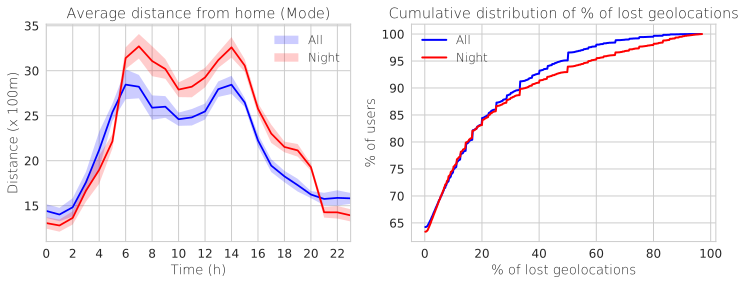

In [6]:
import seaborn as sns
plt.figure(figsize=(12,4))

sns.set(style='whitegrid',font="normal",font_scale=1.2)

sns.plt.subplot(121)
sns.tsplot(list(dic_most_freq.values()),color="b")
sns.tsplot(list(dic_most_freq_night.values()),color="r")
sns.plt.xlabel("Time (h)",weight="light")
sns.plt.ylabel("Distance (x 100m)",weight="light")
sns.plt.title("Average distance from home (Mode)",weight="light")
sns.plt.xticks(range(0,24,2))
sns.plt.legend(["All","Night"],prop={"weight":"light"})

sns.plt.subplot(122)
H_all,X1_all = np.histogram(loss_all, bins = 500, normed = True )
dx_all = X1_all[1] - X1_all[0]
F1_all = np.cumsum(H_all)*dx_all
H_night,X1_night = np.histogram(loss_night, bins = 500, normed = True )
dx_night = X1_night[1] - X1_night[0]
F1_night= np.cumsum(H_night)*dx_night
plt.plot(X1_all[1:]*100, F1_all*100,color="b",lw=2)
plt.plot(X1_night[1:]*100, F1_night*100,color="r",lw=2)
plt.xlabel("% of lost geolocations",weight="light")
plt.ylabel("% of users",weight="light")
sns.plt.legend(["All","Night"],prop={"weight":"light"})
sns.plt.title("Cumulative distribution of % of lost geolocations",weight="light")

#sns.plt.savefig("/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/icdm18/dist_to_home.pdf")
sns.plt.show()

## Appendix: Corrected Income in INSEE

In [7]:
def get_cor_income(presentable_insee_df):
    nb_menages=presentable_insee_df.men
    nb_menages_unipers=presentable_insee_df.men_1ind
    nb_menages_gt5=presentable_insee_df.men_5ind
    nb_menages_2t5=nb_menages-nb_menages_unipers-nb_menages_gt5

    people=presentable_insee_df.ind_r
    children=presentable_insee_df.ind_age1+presentable_insee_df.ind_age2+presentable_insee_df.ind_age3+presentable_insee_df.ind_age4# From 
    adults=people-children # SURE
    adults_count_as_one=nb_menages_unipers+nb_menages_gt5+nb_menages_2t5 # 1 By menage SURE
    adults_count_as_half=adults-adults_count_as_one # SURE

    work_force=presentable_insee_df.ind_age6-presentable_insee_df.ind_age7

    income_sum_by_uc=presentable_insee_df.ind_srf

    uc=0.3*children+ 0.5*adults_count_as_half+adults_count_as_one
    return (np.array(income_sum_by_uc*uc)/(nb_menages*work_force))

<a id='user_text'></a>
## Appendix: User Text

In [8]:
#%load_ext autoreload
#%autoreload 2
""" Load textual information of users """
def generate_text_data(fname,tab_split):
    print("Loading Tweets ...")
    f=open(fname,"r")
    data=[]
    sheisse=0
    for line in tqdmn(f.readlines()):
        info=line.split(tab_split)
        if len(info)!=2:
            sheisse+=1
            continue
        idx,tweet=info
        data.append((idx,tweet))
    tweets=pd.DataFrame(data,columns=["id","tweet"])
    tweets["id"]=[int(idx) for idx in tweets.id]
    usr_text=(tweets.groupby('id',squeeze=True,)['tweet'].apply(lambda x: "%s" % ' '.join(x))).to_frame()
    print(sheisse)
    return usr_text

## Appendix: Download tweets from geolocated users

In [ ]:
#!/usr/bin/env python
#encoding: utf-8

import sys
import pandas as pd
#geo_home_france=pd.read_csv(header=0,index_col=0,filepath_or_buffer="/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/dgeo_france_most_freq.csv")
#geo_usrs=list(geo_home_france.usr)

import pickle
data_ses=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/all_together_dic.p","rb"))
geo_usrs=list(data_ses.keys())


#Get tweets from geousers active enogh
import tweepy #https://github.com/tweepy/tweepy
import csv
from tqdm import tqdm
import re
#Twitter API credentials
consumer_key = "G6LrnHdGQcW7hZGsSQRT1gnkQ"
consumer_secret = "ewUYjRO7rZC1l97HZHRy8Pt9AkzfqY2YXRk10xUqWMAnQU47D0"
access_key = "836532209322508289-1xr3ZxA4ObClD0Ixx2a81MwnF2dR4da"
access_secret = "G9rx8oMPreqRYK6JwLIJ7XlBHz2Ute1Jc54YrOm4oI6Rs"



def get_all_tweets(user_id):
	#Twitter only allows access to a users most recent 3240 tweets with this method
	#authorize twitter, initialize tweepy
	auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
	auth.set_access_token(access_key, access_secret)
	api = tweepy.API(auth)
	#initialize a list to hold all the tweepy Tweets
	alltweets = []
	#make initial request for most recent tweets (200 is the maximum allowed count)
	new_tweets = api.user_timeline(user_id = user_id,count=200)
	#save most recent tweets
	alltweets.extend(new_tweets)
	#save the id of the oldest tweet less one
	oldest = alltweets[-1].id - 1;print ("getting tweets before %s" % (oldest))
	#keep grabbing tweets until there are no tweets left to grab
	while len(new_tweets) > 0:
		#all subsiquent requests use the max_id param to prevent duplicates
		new_tweets = api.user_timeline(user_id = user_id,count=200,max_id=oldest)
		#save most recent tweets
		alltweets.extend(new_tweets)
		#update the id of the oldest tweet less one
		oldest = alltweets[-1].id - 1
	#cleaned_text = [re.sub(r'http[s]?:\/\/.*[\W]*', '', i.text, flags=re.MULTILINE) for i in alltweets] # remove urls
	#cleaned_text = [re.sub(r'@[\w]*', '', i, flags=re.MULTILINE) for i in cleaned_text] # remove the @twitter mentions
	#cleaned_text = [re.sub(r'RT.*','', i, flags=re.MULTILINE) for i in cleaned_text] # delete the retweets
	#transform the tweepy tweets into a 2D array that will populate the csv
	#outtweets = [[tweet.id_str, tweet.created_at, cleaned_text[idx].encode("utf-8")] for idx,tweet in enumerate(alltweets)]
	#transform the tweepy tweets into a 2D array that will populate the csv
	outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
	#write the csv
	with open('/warehouse/COMPLEXNET/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/tweets/geolocated_users/%s_tweets.csv'%user_id, 'w') as f:
		writer = csv.writer(f)
		writer.writerow(["id","created_at","text"])
		writer.writerows(outtweets)
	return(True)

if __name__ == '__main__':
	for idx in tqdm(geo_usrs):
		success=False
		i=0
		while not success:
			try:
				success=get_all_tweets(idx)
			except:
				i+=1
				print(sys.exc_info()[0])
				if i>2:
					success=True
